# Bike Sharing Assignment

In [952]:
#Import all required libraries
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
#For ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [953]:
#Load bike sharing dataset
bike_df=pd.read_csv("day.csv")

## Reading & Understanding the data

In [954]:
#Read top 5 rows of dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [955]:
#Check shape of dataset
print(bike_df.shape)

(730, 16)


In [956]:
#Generate descriptive statistics of dataset
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [957]:
#Print a concise summary of a DataFrame.
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


#### On basis of above details it is concluded that :
1. There are 730 rows and 16 columns in given dataset.
2. There is no column with null values. 
3. There is only one column which is object type, all other columns are either int or float type

## Data Cleaning

In [958]:
#Droping duplicate rows if present in dataset
bike_df.drop_duplicates(subset=None, inplace=True)

#Print shape of dataset after droping duplicate data rows
print(bike_df.shape)

(730, 16)


As we can see there is no change in shape of dataset after droping duplicate data rows. Hence it proves that dataset contains no duplicate rows. 

In [959]:
# 1. Droping instant column as it represnt only row number.
# 2. Droping casual and registered column as we have cnt column which is sum of both casual and registered column, 
#    and we dont need both column seperatly. 
# 3. Droping dteday column as we already have mnth and yr columns which can help in our analysis.

bike_df.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

#Print shape of dataset after droping above columns
print(bike_df.shape)

(730, 12)


## Data Visualization

There are some column like **season,mnth,weathersit,weekday** which are categorical in nature but is in numeric value.
So we need to convert these columns values in string on basis of data dictionary provided.

In [960]:
#Converting season column values as per data dictionary
bike_df.season.replace((1,2,3,4), ('spring','summer','fall','winter'), inplace=True)

In [961]:
#Converting mnth column values in string
bike_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),
                      ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [962]:
#Converting weekday column values in string
bike_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [964]:
#Converting weathersit column values as per data dictionary
bike_df.weathersit.replace((1,2,3,4), ('Clear_Partly_cloudy','Mist_Cloudy',
                                       'Light_Snow_Rain_Thunderstorm_Scatteredclouds',
                                       'HeavyRain_IcePallets_Thunderstorm_Mist_Snow_Fog'), inplace=True)


##### To understand relationship between numeric variables of dataset

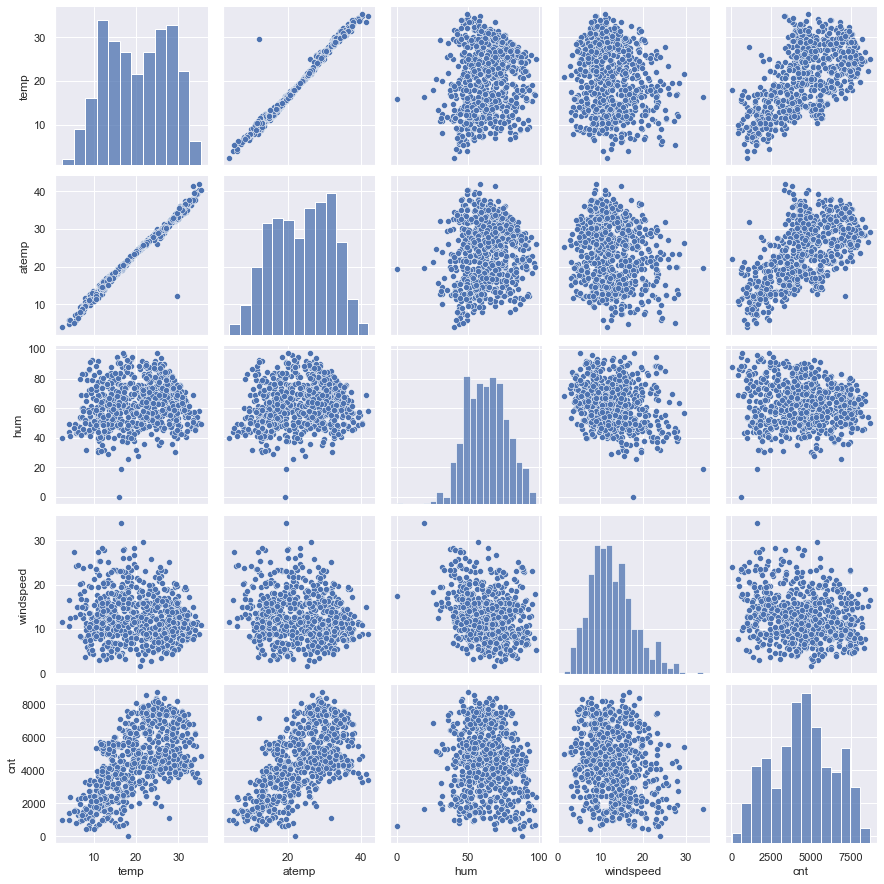

In [965]:
#Plotting pair plot of numeric varables of dataset
bike_df_numeric = bike_df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_df_numeric)
plt.show()

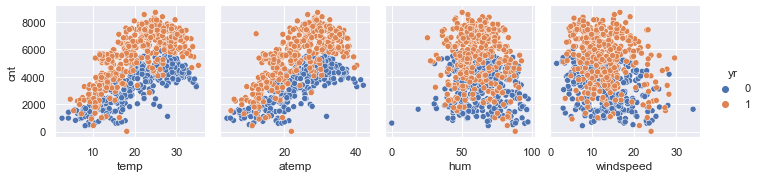

In [966]:
# Analysis of effect of year on total rental bikes count of numeric varables of dataset
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'], y_vars=['cnt'] , 
             data=bike_df[['yr','temp','atemp','hum','windspeed','cnt']], hue='yr')

#Below plots shows that numeric variables have greater value in year 2019 than in 2018

##### Above plot shows that temp and atemp columns are very much related to each other.

<AxesSubplot:>

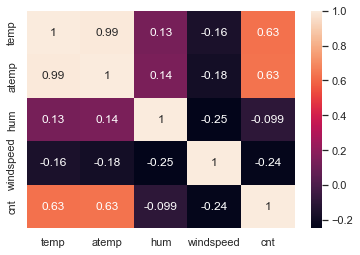

In [967]:
#To check the correlation of all numeric columns of dataset, plot heatmap.
sns.heatmap(bike_df_numeric.corr(), annot = True)


#### Above plot shows that :
1. temp and atemp are highly corelated (0.99)
2. windspeed is negivetely correlated to each numeric column
3. Maximum correlation of cnt(total rental bikes count) is with temp and atemp

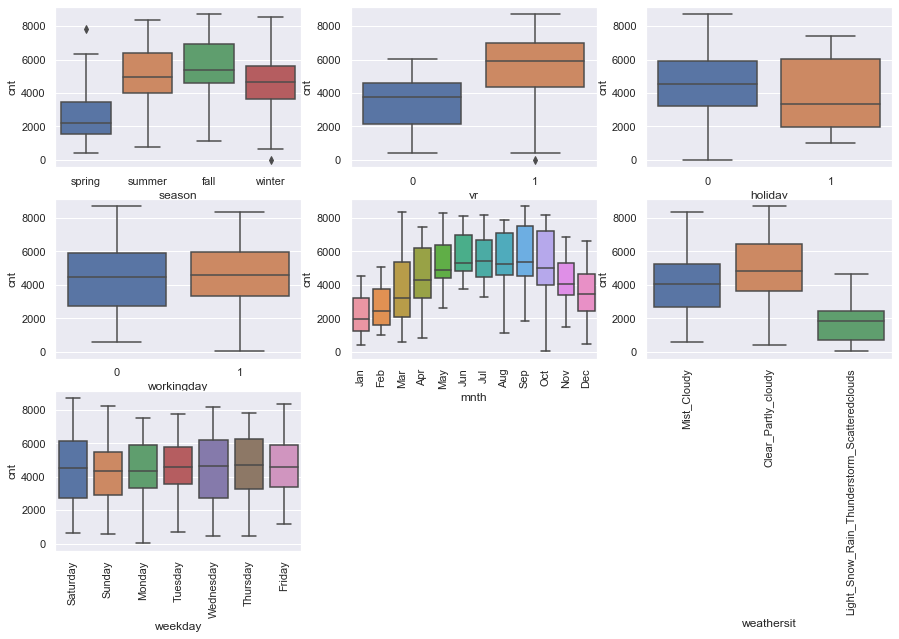

In [968]:
# Analyze the relationship of categorical variables with target variable ie. total count of rental bikes , cnt
plt.figure(figsize=(15, 10))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)

plt.subplot(3,3,5)
ax= sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.subplot(3,3,6)
ax = sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.subplot(3,3,7)
ax=sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

#### Above plots shows that :
1. Total rental bikes count are greater in fall season and less in spring season.
2. Total rental bikes count are greater in 2019 than 2018
3. Total rental bikes count are greater in Clear or Partly cloudy weather and less in light snow or thunderstorm situation.

<AxesSubplot:xlabel='season', ylabel='cnt'>

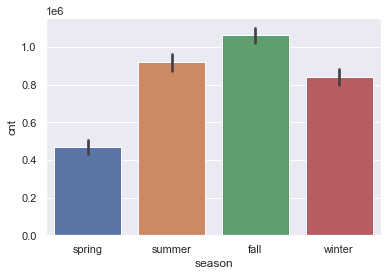

In [969]:
#Analysis of season effect on total count of rental bikes
sns.barplot(x='season', y='cnt', data=bike_df, estimator=np.sum )
#Below graph shows total count of rental bikes is higher in fall season and lower in spring season

<AxesSubplot:xlabel='yr', ylabel='cnt'>

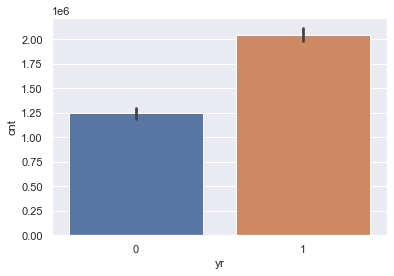

In [970]:
#Analysis of year effect on total count of rental bikes
sns.barplot(x='yr', y='cnt', data=bike_df, estimator=np.sum )
#Below graph shows that total count of rental bikes in grater in year 2019 than in 2018

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

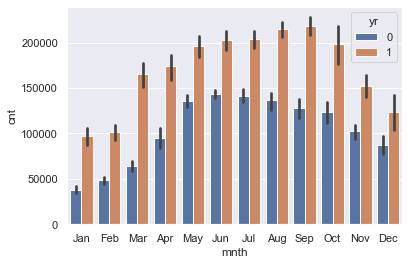

In [971]:
#Analysis of year month effect on total count of rental bikes
sns.barplot(x='mnth', y='cnt', data=bike_df, hue='yr',estimator=np.sum )
#Below graph shows that total count of rental bikes in grater in sep month of year 2019 than in 2018

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

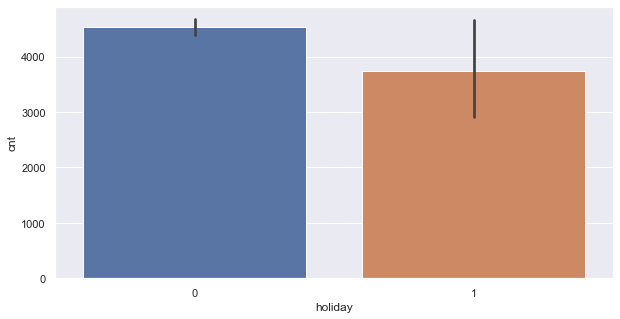

In [972]:
#Analysis of holiday effect on total count of rental bikes
plt.figure(figsize=(10,5))
sns.barplot(x='holiday', y='cnt', data=bike_df,estimator=np.mean )
#Below plot shows that maximun number of count of rental bikes are on non holiday days 

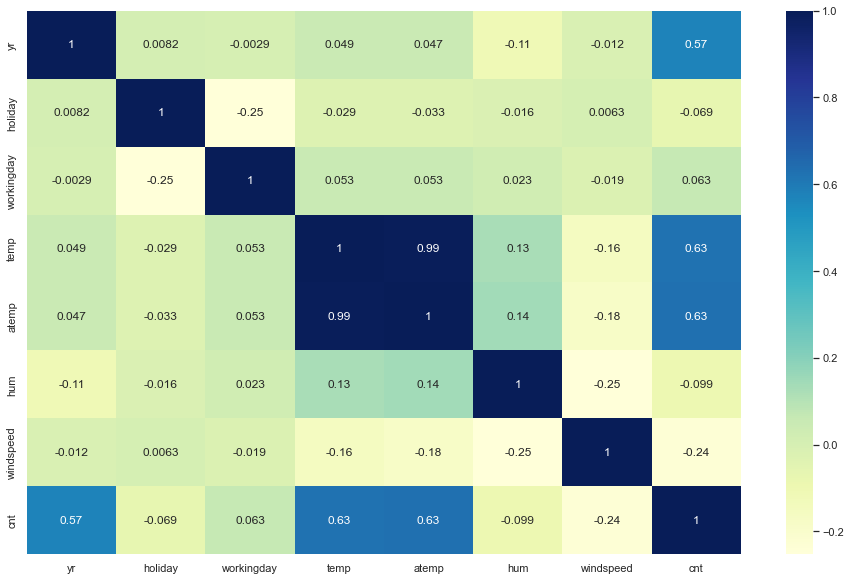

In [973]:
#Analyse correlation of all variables in dataset
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Data Preparation

####  Create Dummy Variables

In [974]:
#Create dummy variable for season column
season_dummyDf = pd.get_dummies(bike_df['season'], drop_first = True)
print(season_dummyDf)

#Create dummy variable for month column
month_dummyDf = pd.get_dummies(bike_df['mnth'], drop_first = True)
print(month_dummyDf)

#Create dummy variable for weekday column
weekday_dummyDf = pd.get_dummies(bike_df['weekday'], drop_first = True)
print(weekday_dummyDf)

#Create dummy variable for weather situation column
weather_dummyDf = pd.get_dummies(bike_df['weathersit'], drop_first = True)
print(weather_dummyDf)


     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]
     Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0      0    0    0    1    0    0    0    0    0    0    0
1      0    0    0    1    0    0    0    0    0    0    0
2      0    0    0    1    0    0    0    0    0    0    0
3      0    0    0    1    0    0    0    0    0    0    0
4      0    0    0    1    0    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
725    0    1    0    0    0    0    0    0    0    0    0
726    0    1    0    0    0    0    0    0    0    0    0
727    0    1    0    0    0    0    0    0    0    0    0
728    0    1    0    0    0    0    0    0    0  

In [975]:
#merging dummy columns to main dataframe
bike_new_df = pd.concat([bike_df,season_dummyDf,month_dummyDf,weekday_dummyDf,weather_dummyDf], axis = 1)

#Print new dataset after merging dummy columns
print(bike_new_df.head())

   season  yr mnth  holiday    weekday  workingday           weathersit  \
0  spring   0  Jan        0   Saturday           0          Mist_Cloudy   
1  spring   0  Jan        0     Sunday           0          Mist_Cloudy   
2  spring   0  Jan        0     Monday           1  Clear_Partly_cloudy   
3  spring   0  Jan        0    Tuesday           1  Clear_Partly_cloudy   
4  spring   0  Jan        0  Wednesday           1  Clear_Partly_cloudy   

        temp     atemp      hum  ...  Oct  Sep  Monday  Saturday  Sunday  \
0  14.110847  18.18125  80.5833  ...    0    0       0         1       0   
1  14.902598  17.68695  69.6087  ...    0    0       0         0       1   
2   8.050924   9.47025  43.7273  ...    0    0       1         0       0   
3   8.200000  10.60610  59.0435  ...    0    0       0         0       0   
4   9.305237  11.46350  43.6957  ...    0    0       0         0       0   

   Thursday  Tuesday  Wednesday  Light_Snow_Rain_Thunderstorm_Scatteredclouds  \
0         0

In [976]:
#Print shape of dataframe after merging dummy columns
print(bike_new_df.shape)

(730, 34)


In [977]:
#Get information about a DataFrame including the index dtype and columns, non-null values and memory usage.
print(bike_new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   season                                        730 non-null    object 
 1   yr                                            730 non-null    int64  
 2   mnth                                          730 non-null    object 
 3   holiday                                       730 non-null    int64  
 4   weekday                                       730 non-null    object 
 5   workingday                                    730 non-null    int64  
 6   weathersit                                    730 non-null    object 
 7   temp                                          730 non-null    float64
 8   atemp                                         730 non-null    float64
 9   hum                                           730 non-null    flo

In [978]:
#Removing main column from which dummy column is created
bike_new_df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

#Print shape of dataframe after removing above columns
print(bike_new_df.shape)

(730, 30)


#### Split data and create Train and Test dataset

In [979]:
np.random.seed(0)
bike_new_df_train, bike_new_df_test = train_test_split(bike_new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [980]:
#Print shape of new train and test dataset
print(bike_new_df_train.shape)
print(bike_new_df_test.shape)

(510, 30)
(219, 30)


In [981]:
#Rescaling Train dataframe via MinMaxScaler
rescaler = MinMaxScaler()
bike_df_numeric = ['temp','atemp','hum','windspeed','cnt']
bike_new_df_train[bike_df_numeric] = rescaler.fit_transform(bike_new_df_train[bike_df_numeric])

#Print train datafram after rescaling
print(bike_new_df_train.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  ...  Oct  Sep  Monday  Saturday  Sunday  \
653  0.864243       0       0  ...    1    0       0         0       0   
576  0.827658       0       0  ...    0    0       0         0       0   
426  0.465255       1       0  ...    0    0       0         1       0   
728  0.204096       1       0  ...    0    0       0         0       1   
482  0.482973       0       1  ...    0    0       0         1       0   

     Thursday  Tuesday  Wednesday  \
653         0        1          0   
576         0        1          0   
426  

In [982]:
#Rescaling Test dataframe via MinMaxScaler
rescaler = MinMaxScaler()
bike_df_numeric = ['temp','atemp','hum','windspeed','cnt']
bike_new_df_test[bike_df_numeric] = rescaler.fit_transform(bike_new_df_test[bike_df_numeric])

#Print train datafram after rescaling
print(bike_new_df_test.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.837241  0.778767  0.534223   0.149393   
535   1        0           1  0.911423  0.855132  0.470417   0.231142   
299   0        0           1  0.496221  0.492359  0.777843   0.443398   
221   0        0           1  0.890387  0.805661  0.236659   0.449707   
152   0        0           1  0.821739  0.749249  0.070765   0.682387   

          cnt  spring  summer  ...  Oct  Sep  Monday  Saturday  Sunday  \
184  0.704300       0       0  ...    0    0       1         0       0   
535  0.725421       0       1  ...    0    0       0         0       0   
299  0.278853       0       0  ...    1    0       0         0       0   
221  0.545512       0       0  ...    0    0       0         0       0   
152  0.569148       0       1  ...    0    0       0         0       0   

     Thursday  Tuesday  Wednesday  \
184         0        0          0   
535         0        0          1   
299  

In [983]:
bike_new_df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scatteredclouds,Mist_Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0.764151,0,1,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,0,0,1,0,0,0,0,0,1


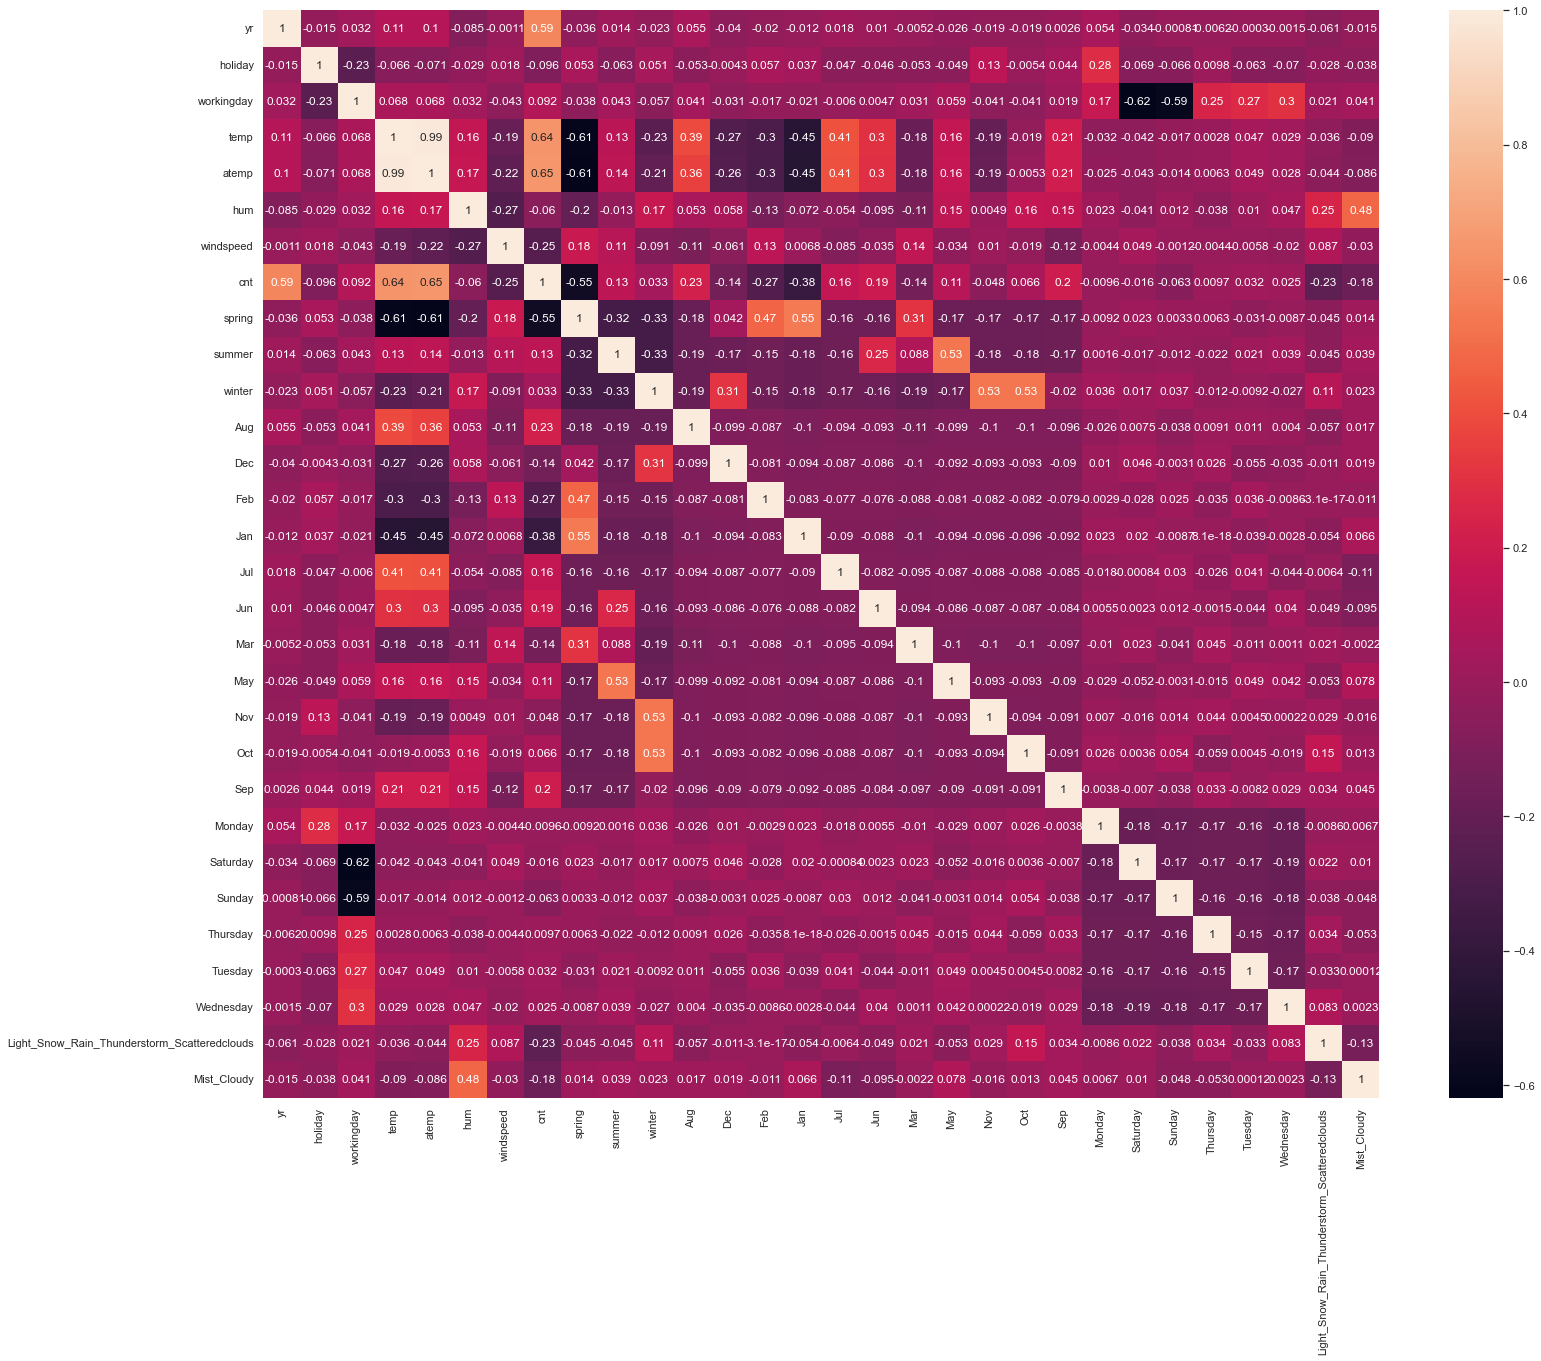

In [984]:
#Analyse correlation of all variables in train dataset
plt.figure(figsize = (25, 20))
sns.heatmap(bike_new_df_train.corr(), annot = True)
plt.show()

#### Above plot shows that 
1. temp and atemp are highly correlated

## Data Modelling and Evaluation

In [985]:
#Dividing train dataset into x and y for building model
y_train = bike_new_df_train.pop('cnt')
x_train = bike_new_df_train

y_test = bike_new_df_test.pop('cnt')
x_test = bike_new_df_test

In [986]:
#Building linear model executing RFE
lr = LinearRegression()
lr.fit(x_train, y_train)
rfe = RFE(lr, 15)      
rfe = rfe.fit(x_train, y_train)

#Checking selected parameter in list
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', False, 9),
 ('May', False, 15),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 14),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 12),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Light_Snow_Rain_Thunderstorm_Scatteredclouds', True, 1),
 ('Mist_Cloudy', True, 1)]

In [987]:
#Get selected variables
selectedCol = x_train.columns[rfe.support_]
selectedCol

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Saturday',
       'Light_Snow_Rain_Thunderstorm_Scatteredclouds', 'Mist_Cloudy'],
      dtype='object')

In [988]:
#Get unselected variables
unselectedCol=x_train.columns[~rfe.support_]
unselectedCol

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [989]:
# Creating dataframe with RFE selected variables
x_train_rfe = x_train[selectedCol]
x_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sep,Saturday,Light_Snow_Rain_Thunderstorm_Scatteredclouds,Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1


In [990]:
#Define VIF funtion
def getVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [991]:
getVIF(x_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Mist_Cloudy,2.29
0,yr,2.09
12,Saturday,1.98


In [992]:
x_train_rfe = x_train_rfe.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Saturday,1.97
8,Jan,1.62
9,Jul,1.59


In [993]:
#Building model using statsmodel
x_train_rfe1 = sm.add_constant(x_train_rfe)
#Executing model
lr1 = sm.OLS(y_train,x_train_rfe1).fit()
#Print OLS linear regression result
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.33e-189
Time:                        23:30:47   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [994]:
getVIF(x_train_rfe1)

,Features,VIF
0,const,62.00
6,spring,5.03
4,temp,3.62
8,winter,3.45
7,summer,2.61
3,workingday,1.87
12,Saturday,1.77
9,Jan,1.56
10,Jul,1.48
11,Sep,1.29


In [995]:
x_train_new = x_train_rfe1.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new)

,Features,VIF
0,const,58.73
6,spring,4.96
4,temp,3.38
8,winter,3.36
7,summer,2.59
3,workingday,1.87
11,Saturday,1.77
9,Jul,1.48
10,Sep,1.29
2,holiday,1.16


In [996]:
x_train_new = x_train_new.drop(['const'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
10,Saturday,1.96
8,Jul,1.58
12,Mist_Cloudy,1.56


In [997]:
# Add a constant
x_train_new2 = sm.add_constant(x_train_new)

lr2 = sm.OLS(y_train, x_train_new2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.73e-189
Time:                        23:30:49   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [998]:
x_train_new3 = x_train_new2.drop(['Jul'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new3)

,Features,VIF
0,const,58.02
6,spring,4.76
4,temp,3.32
8,winter,3.12
7,summer,2.24
3,workingday,1.87
10,Saturday,1.77
9,Sep,1.17
2,holiday,1.16
5,windspeed,1.10


In [999]:
x_train_new3 = x_train_new3.drop(['const'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new3)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
5,spring,2.40
0,yr,2.07
6,summer,2.00
9,Saturday,1.96
7,winter,1.83
11,Mist_Cloudy,1.56
8,Sep,1.24


In [1000]:
# Add a constant
x_train_new4 = sm.add_constant(x_train_new3)

lr4 = sm.OLS(y_train, x_train_new4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.48e-188
Time:                        23:30:51   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [1001]:
x_train_new4 = x_train_new4.drop(['holiday'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new4)

,Features,VIF
0,const,57.05
5,spring,4.75
3,temp,3.32
7,winter,3.12
6,summer,2.24
2,workingday,1.65
9,Saturday,1.63
8,Sep,1.17
4,windspeed,1.09
10,Light_Snow_Rain_Thunderstorm_Scatteredclouds,1.05


In [1002]:
x_train_new4 = x_train_new4.drop(['const'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new4)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,Saturday,1.83
6,winter,1.77
10,Mist_Cloudy,1.56
7,Sep,1.23


In [1003]:
# Add a constant
x_train_new5 = sm.add_constant(x_train_new4)

lr5 = sm.OLS(y_train, x_train_new5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.86e-189
Time:                        23:30:53   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [1004]:
x_train_new5 = x_train_new5.drop(['const'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new5)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,Saturday,1.83
6,winter,1.77
10,Mist_Cloudy,1.56
7,Sep,1.23


In [1005]:
x_train_new5 = x_train_new5.drop(['spring'], axis = 1)
# Run the function to calculate VIF for the new model
getVIF(x_train_new5)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist_Cloudy,1.53
5,winter,1.40
6,Sep,1.20
8,Light_Snow_Rain_Thunderstorm_Scatteredclouds,1.08


In [1006]:
x_train_new6 = sm.add_constant(x_train_new5)

lr6 = sm.OLS(y_train, x_train_new6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.47e-188
Time:                        23:30:55   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [1007]:
#droping const
x_train_new7 = x_train_new6.drop(['const'], axis = 1)

In [1008]:
# Run the function to calculate VIF for the new model
getVIF(x_train_new7)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist_Cloudy,1.53
5,winter,1.40
6,Sep,1.20
8,Light_Snow_Rain_Thunderstorm_Scatteredclouds,1.08


#### For above Linear Regression Model 6 (lr6) coefficients of all parameters are non zero, which means null hypothesis can be rejected

#### F-statistic value of Linear Regression Model 6 (lr6) is 254.0 , which is much greater

In [1009]:
lr6.params

const                                           0.075325
yr                                              0.233056
workingday                                      0.056323
temp                                            0.549936
windspeed                                      -0.155238
summer                                          0.087429
winter                                          0.131826
Sep                                             0.097236
Saturday                                        0.067688
Light_Snow_Rain_Thunderstorm_Scatteredclouds   -0.288021
Mist_Cloudy                                    -0.081347
dtype: float64

#### Equation of best fitted surface based on model lr6:
cnt = 0.075325+(0.233056 * yr)+(0.056323 *workingday )+(0.549936 * temp)-(0.155238 * windspeed)+
(0.087429 * summer)+(0.131826 * winter)+(0.097236 * Sep)+(0.067688 * Saturday)-
(0.288021 * Light_Snow_Rain_Thunderstorm_Scatteredclouds)-(0.081347 * Mist_Cloudy)

#### A coefficients of below parameter signifies that :
1. **const** : A constant value coefficent signifies that the total bike rental count still increase by 0.0753 unit, even if there is no predictor variables

2. **yr** : A coefficient of year signifies that if a yr variable value increases by a unit , then the total bike rental count will increase by 0.2331 unit.

3. **workingday** : A coefficient of workingday signifies that if a workingday variable value increases by a unit , then the total bike rental count will increase by 0.0563 unit.

4. **temp** : A coefficient of temperature signifies that if a temperature variable value increases by a unit , then the total bike rental count will increase by 0.5499 unit.

5. **windspeed** : A coefficient of windspeed signifies that if a windspeed variable value increases by a unit , then the total bike rental count will decreases by 0.1552 unit.

6. **summer** : A coefficient of summer signifies that if a summer variable value increases by a unit , then the total bike rental count will increase by 0.0874 unit

7. **winter** : A coefficient of winter signifies that if a winter variable value increases by a unit , then the total bike rental count will increase by 0.1318 unit

8. **Sep** : A coefficient of Sep signifies that if a Sep variable value increases by a unit , then the total bike rental count will increase by 0.0972 unit

9. **Saturday** : A coefficient of Saturday signifies that if a Saturday variable value increases by a unit , then the total bike rental count will increase by 0.0677 unit

10. **Light_Snow_Rain_Thunderstorm_Scatteredclouds** : A coefficient of weather condition of light rain/snow/thunderstrome signifies that if its value increases by a unit , then the total bike rental count will decreases by 0.2880 unit.

11. **windspeed** : A coefficient of windspeed signifies that if a windspeed variable value increases by a unit , then the total bike rental count will decreases by 0.0813 unit.

#### Check various assumption of linear regression model

#### Model Validation

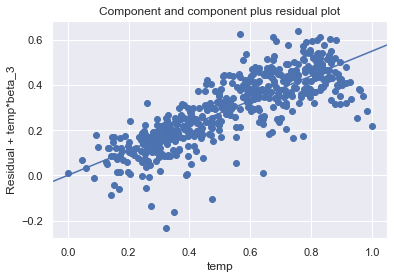

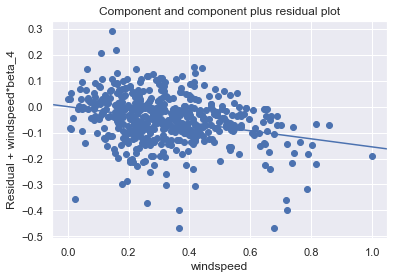

In [1010]:
#Check linear relationship between predictor variable and model

sm.graphics.plot_ccpr(lr6, 'temp',)
sm.graphics.plot_ccpr(lr6, 'windspeed')

plt.show()

#Below plots shows the linear relationship of temp and windspeed variable

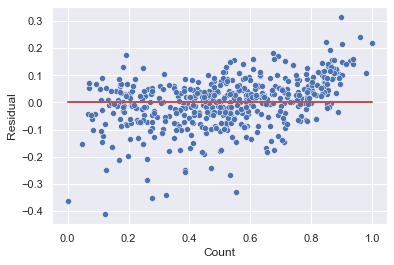

In [1011]:
#Check Homoscedasticity
y_train_pred = lr6.predict(x_train_new6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#below graph show no residual value pattern

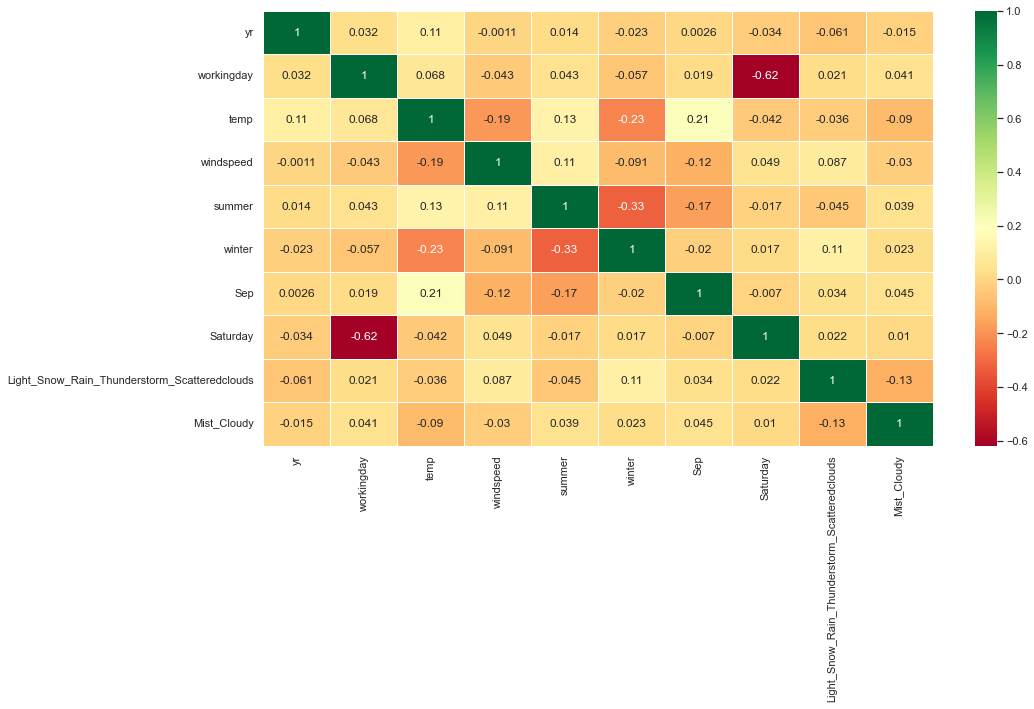

In [1012]:
#Multicolinearity
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new7.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [1013]:
getVIF(x_train_new7)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist_Cloudy,1.53
5,winter,1.40
6,Sep,1.20
8,Light_Snow_Rain_Thunderstorm_Scatteredclouds,1.08


As it is clear that all features have vif less than 5 hence we can consider there is no multicolinearity amont the features

In [1014]:
#Autocorrelation test 
print('The Durbin-Watson value for Final Model is ',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))
#It proves that there is almost no autocorrelation.

The Durbin-Watson value for Final Model is  2.08


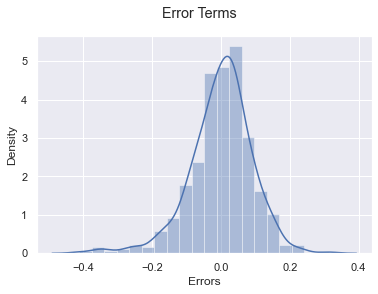

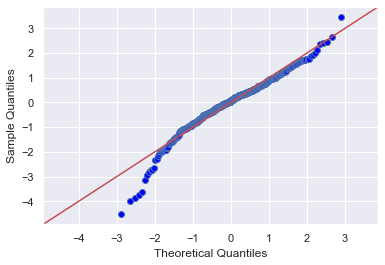

In [1015]:
#Error Normality
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()
#Below plot shows error terms are normally distributed

#### Final Modal Predictions

In [1016]:
selecttraincolumn=x_train_new7.columns

x_test=x_test[selecttraincolumn]

# Adding constant variable to test dataframe
x_test_lr6 = sm.add_constant(x_test)

x_test_lr6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   const                                         219 non-null    float64
 1   yr                                            219 non-null    int64  
 2   workingday                                    219 non-null    int64  
 3   temp                                          219 non-null    float64
 4   windspeed                                     219 non-null    float64
 5   summer                                        219 non-null    uint8  
 6   winter                                        219 non-null    uint8  
 7   Sep                                           219 non-null    uint8  
 8   Saturday                                      219 non-null    uint8  
 9   Light_Snow_Rain_Thunderstorm_Scatteredclouds  219 non-null    ui

In [1017]:
#Making predictions
y_pred = lr6.predict(x_test_lr6)


#### Modal Evaluation

Text(0, 0.5, 'y_pred')

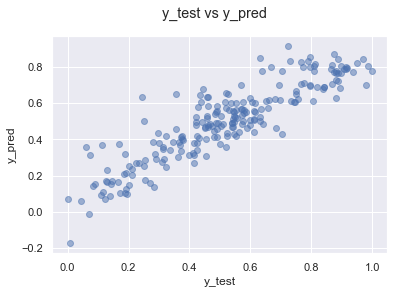

In [1018]:
# plotting y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [1019]:
#R2 Value Calculation for test dataset
r2 = round(r2_score(y_test, y_pred),4)
print(r2)

0.788


In [1020]:
#Adjusted R2 Value Calculation for test dataset
n = x_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7778

Train dataset R2 value  = 0.836
Train dataset Adjusted R2 value =  0.832

In [1021]:
#Calculating RMSE 
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE


0.1096

In [1022]:
#Calculating Mean Absolute Error 
mae = round(mean_absolute_error(y_test, y_pred),4)
mae

0.0857

In [1023]:
#RMSE and Mean Absolute Error value indicate that model is good

#Summary :
1. We can se that temperature variable have highest coefficient 0.5499 , which means if the temperature increases by one unit the number of bike rentals count increases by 0.5499 units.
2. We also see there are some variables with negative coefficients.like windspeed which if increase the bike rental count decreases by same coefficient unit
3. Temperature, year and weather could be a prime factor for making decision for good model